# Exploratory Data Analysis
Maestría en Inteligencia Artificial Aplicada

Abraham Rincón Treviño  A00819677

Erick de Jesus Hernández Cerecedo A01066428

México, 4 de febrero de 2024

In [1]:
# Importacion de librerias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\arincon\AppData\Local\Temp\ipykernel_53080\2913250301.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'TruckLogs.csv'

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(archivo_csv)

C:\Users\arincon\AppData\Local\Temp\ipykernel_53080\3622018149.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   TruckNumber       531899 non-null  object 
 2   Latitude          531899 non-null  float64
 3   Longitude         531899 non-null  float64
 4   ApiDate           531899 non-null  object 
 5   StatusTime        0 non-null       float64
 6   Direction         426764 non-null  object 
 7   Bearing           531899 non-null  int64  
 8   Speed             531899 non-null  float64
 9   GeoTab_Id         531899 non-null  object 
 10  IsDriving         531899 non-null  int64  
 11  Country           531899 non-null  object 
 12  Ignition          531899 non-null  int64  
 13  Odometer          531899 non-null  float64
 14  SerialNumber      531899 non-null  object 
 15  City              448920 non-null  object 
 16  FormattedAddress  53

In [5]:
# Debido a el estudio del dataset echo en la previa entrega, determinamos que ciertas columnas no son necesarias.
#TruckNumber,  GeoTab_Id, PostalCode,Region, Street, StreetName, StreetNumber , ApiUTCDate
#Estas variables nos dan informacion redundante por lo que las eliminaremos.

df = df.drop(['TruckNumber', 'GeoTab_Id', 'PostalCode', 'Region', 'Street', 'StreetName', 'StreetNumber', 'ApiUTCDate'], axis=1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   Latitude          531899 non-null  float64
 2   Longitude         531899 non-null  float64
 3   ApiDate           531899 non-null  object 
 4   StatusTime        0 non-null       float64
 5   Direction         426764 non-null  object 
 6   Bearing           531899 non-null  int64  
 7   Speed             531899 non-null  float64
 8   IsDriving         531899 non-null  int64  
 9   Country           531899 non-null  object 
 10  Ignition          531899 non-null  int64  
 11  Odometer          531899 non-null  float64
 12  SerialNumber      531899 non-null  object 
 13  City              448920 non-null  object 
 14  FormattedAddress  531899 non-null  object 
 15  OtherCity         0 non-null       float64
 16  PanicFinishDate   0 

In [10]:
#Eliminacion de columnsa faltantes
# Debido a la falta de informacion  y mediante la exploracion de los datos determinamos que estos son irrelevantes.
#Nombre de las columnas ('StatusTime', 'Direction ', 'City ', 'OtherCity ', 'PanicFinishDate', 'Carrier ')

df = df.drop(['StatusTime', 'Direction', 'City', 'OtherCity', 'PanicFinishDate', 'Carrier'], axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   Latitude          531899 non-null  float64
 2   Longitude         531899 non-null  float64
 3   ApiDate           531899 non-null  object 
 4   Bearing           531899 non-null  int64  
 5   Speed             531899 non-null  float64
 6   IsDriving         531899 non-null  int64  
 7   Country           531899 non-null  object 
 8   Ignition          531899 non-null  int64  
 9   Odometer          531899 non-null  float64
 10  SerialNumber      531899 non-null  object 
 11  FormattedAddress  531899 non-null  object 
 12  Mileage           531899 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 52.8+ MB


In [12]:
df.head(5)

,IdTruck,Latitude,Longitude,ApiDate,Bearing,Speed,IsDriving,Country,Ignition,Odometer,SerialNumber,FormattedAddress,Mileage
0,3127333,25.8704,-100.2552,2024-01-15 00:02:40.823,-1,0.0,0,Mexico,0,18511.455599,G915TMB1YB17,"VPCW+82, 65516 Entronque Laredo-Salinas Victor...",0.0
1,3127334,27.4659,-99.5763,2024-01-15 00:02:40.863,0,0.0,0,Mexico,0,21748.613100,G912E78BJUKR,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico",0.0
2,3127335,27.4661,-99.5769,2024-01-15 00:02:40.823,256,0.0,0,Mexico,0,33804.208423,G9SBN33M46K1,"Francisco Echegaray 3913, 150 Aniversario, 882...",0.0
3,3127336,27.5941,-99.5424,2024-01-15 00:02:40.790,21,0.0,0,Mexico,0,32957.217351,G952PWYSK55S,"Nuevo Laredo International Bridge III, Puente ...",0.0
4,3127337,27.4657,-99.5767,2024-01-15 00:02:40.823,-1,0.0,0,Mexico,0,23750.608944,G9VUZ2PD10ZY,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico",0.0


In [13]:
# Lista de columnas de interés
columns_interesantes = ['Bearing', 'Speed', 'Mileage']

# Iteramos a través de las columnas de interés
for column in columns_interesantes:
    # Obtenemos los valores únicos en la columna actual
    unique_values = df[column].unique()
    # Imprimimos los valores únicos de la columna
    print(f'Unique values in {column}: {unique_values}')


Unique values in Bearing: [ -1   0 256  21  89 179 313 271 261 283  24 337 200 277 339 292  71 203
 145 131 165 192 157 181 335 242  47 202 219  20  80 172 206 317 170  25
 210  78 346 322  10 251  75 126 340  42 136 144 222 184 130  19 341 161
 226 357 151 255 228 190  77  45  51  61 338 196  62  65  68 262 191 358
 247 205 105 133 143  14 235 223 209 308 182 125 218   5 187 153 221  13
  46  17 257 186 168   8 152   9 220  27 330 264 119 207 199  79  66  22
 353 204 237 169  23 241  74 189 325 183 252 124 343  12 245 246  15 244
 156 164 212 155  88 215  37 132 266 329 195   7 214 348 177 267 162   2
 263 167 356 147 188 160 173 311 163 294 198 260  26 142 140 197 148 239
 321 216 224 116 127 213 185  69 253 323  93  41 117 318  28 279 347 345
 300 211 138  96 280 128 201 122 193 288 208  98 351 134 111   4 332 217
 258 166 312  40  84 110  39   6 259 137 176  97 269 249  29  60 352 112
 250  18  16 154  53 233 310 102 331  73  38 104 171  70  91 320  54 238
 178 240 159 287 315 355 

In [14]:
#Debido a la falta de informacion en la columna 'mileage' eliminaremos esta columna

df = df.drop(['Mileage'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   Latitude          531899 non-null  float64
 2   Longitude         531899 non-null  float64
 3   ApiDate           531899 non-null  object 
 4   Bearing           531899 non-null  int64  
 5   Speed             531899 non-null  float64
 6   IsDriving         531899 non-null  int64  
 7   Country           531899 non-null  object 
 8   Ignition          531899 non-null  int64  
 9   Odometer          531899 non-null  float64
 10  SerialNumber      531899 non-null  object 
 11  FormattedAddress  531899 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 48.7+ MB


In [17]:
#Debido a la naturaleza de este proyecto y la meta a conseguir con el modelo eliminaremos la columna 'odometer'

df = df.drop(['Odometer'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   Latitude          531899 non-null  float64
 2   Longitude         531899 non-null  float64
 3   ApiDate           531899 non-null  object 
 4   Bearing           531899 non-null  int64  
 5   Speed             531899 non-null  float64
 6   IsDriving         531899 non-null  int64  
 7   Country           531899 non-null  object 
 8   Ignition          531899 non-null  int64  
 9   SerialNumber      531899 non-null  object 
 10  FormattedAddress  531899 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 44.6+ MB


In [18]:
df.describe()

,IdTruck,Latitude,Longitude,Bearing,Speed,IsDriving,Ignition
count,5.318990e+05,531899.000000,531899.000000,531899.000000,531899.000000,531899.000000,531899.000000
mean,3.395014e+06,25.090036,-99.990157,135.483103,11.844196,0.260636,0.431458
std,1.544480e+05,2.814180,0.939178,118.741999,22.078693,0.438982,0.495280
min,3.127333e+06,17.670700,-109.913900,-1.000000,0.000000,0.000000,0.000000
25%,3.261264e+06,22.935350,-100.289800,0.000000,0.000000,0.000000,0.000000
50%,3.395012e+06,25.886800,-99.872800,132.000000,0.000000,0.000000,0.000000
75%,3.528766e+06,27.465900,-99.576800,243.000000,6.000000,1.000000,1.000000
max,3.662531e+06,28.616400,-89.674400,359.000000,86.000000,1.000000,1.000000


In [20]:
df.head()

,IdTruck,Latitude,Longitude,ApiDate,Bearing,Speed,IsDriving,Country,Ignition,SerialNumber,FormattedAddress
0,3127333,25.8704,-100.2552,2024-01-15 00:02:40.823,-1,0.0,0,Mexico,0,G915TMB1YB17,"VPCW+82, 65516 Entronque Laredo-Salinas Victor..."
1,3127334,27.4659,-99.5763,2024-01-15 00:02:40.863,0,0.0,0,Mexico,0,G912E78BJUKR,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico"
2,3127335,27.4661,-99.5769,2024-01-15 00:02:40.823,256,0.0,0,Mexico,0,G9SBN33M46K1,"Francisco Echegaray 3913, 150 Aniversario, 882..."
3,3127336,27.5941,-99.5424,2024-01-15 00:02:40.790,21,0.0,0,Mexico,0,G952PWYSK55S,"Nuevo Laredo International Bridge III, Puente ..."
4,3127337,27.4657,-99.5767,2024-01-15 00:02:40.823,-1,0.0,0,Mexico,0,G9VUZ2PD10ZY,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico"


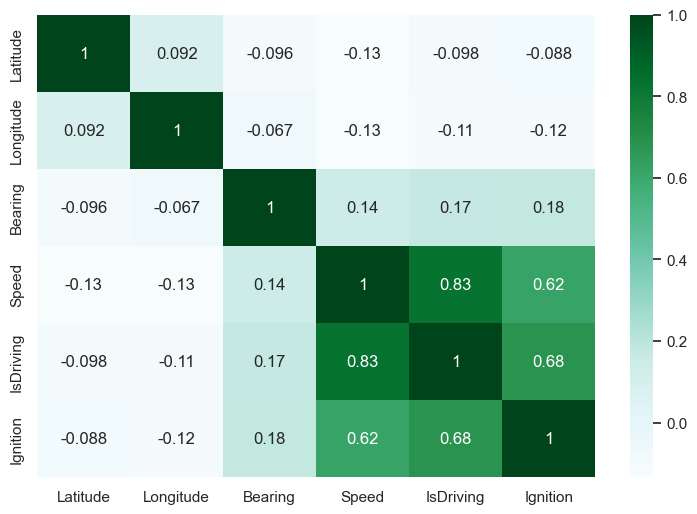

In [23]:
# Seleccionamos las columnas de interés en el DataFrame
datoscorr = df[['Latitude', 'Longitude', 'Bearing', 'Speed', 'IsDriving', 'Ignition']]

# Configuramos el tamaño de la figura para el mapa de calor
sns.set(rc={'figure.figsize': (9, 6)})

# Calculamos la matriz de correlación usando el método de Pearson
corr_matrix = datoscorr.corr(method='pearson')

# Creamos el mapa de calor con colores de la paleta "BuGn" y etiquetas
ax = sns.heatmap(corr_matrix, cmap="BuGn", annot=True)
plt.show()

Debido a la naturaleza del dataset y a la naturaleza del proyecto podmeos osbervar lo simple que son nuestros datos.
Verdaderamente observamos la correlacion directa entre la velocidad, encendido del motor, conducir activamente, el angulo de llegada, como todas estas variables nos estan diciendo practicamente los movimeintos del conductor del camion.

En las futuras entregas estaremos adhiriendo el destino de llegada, junto con informacion historica de viajes para realziar nuestro modelo predictivo, debido a las politicas de la empresa acceder a esta informacion es mas complejo, pero estamos llegando a ello.

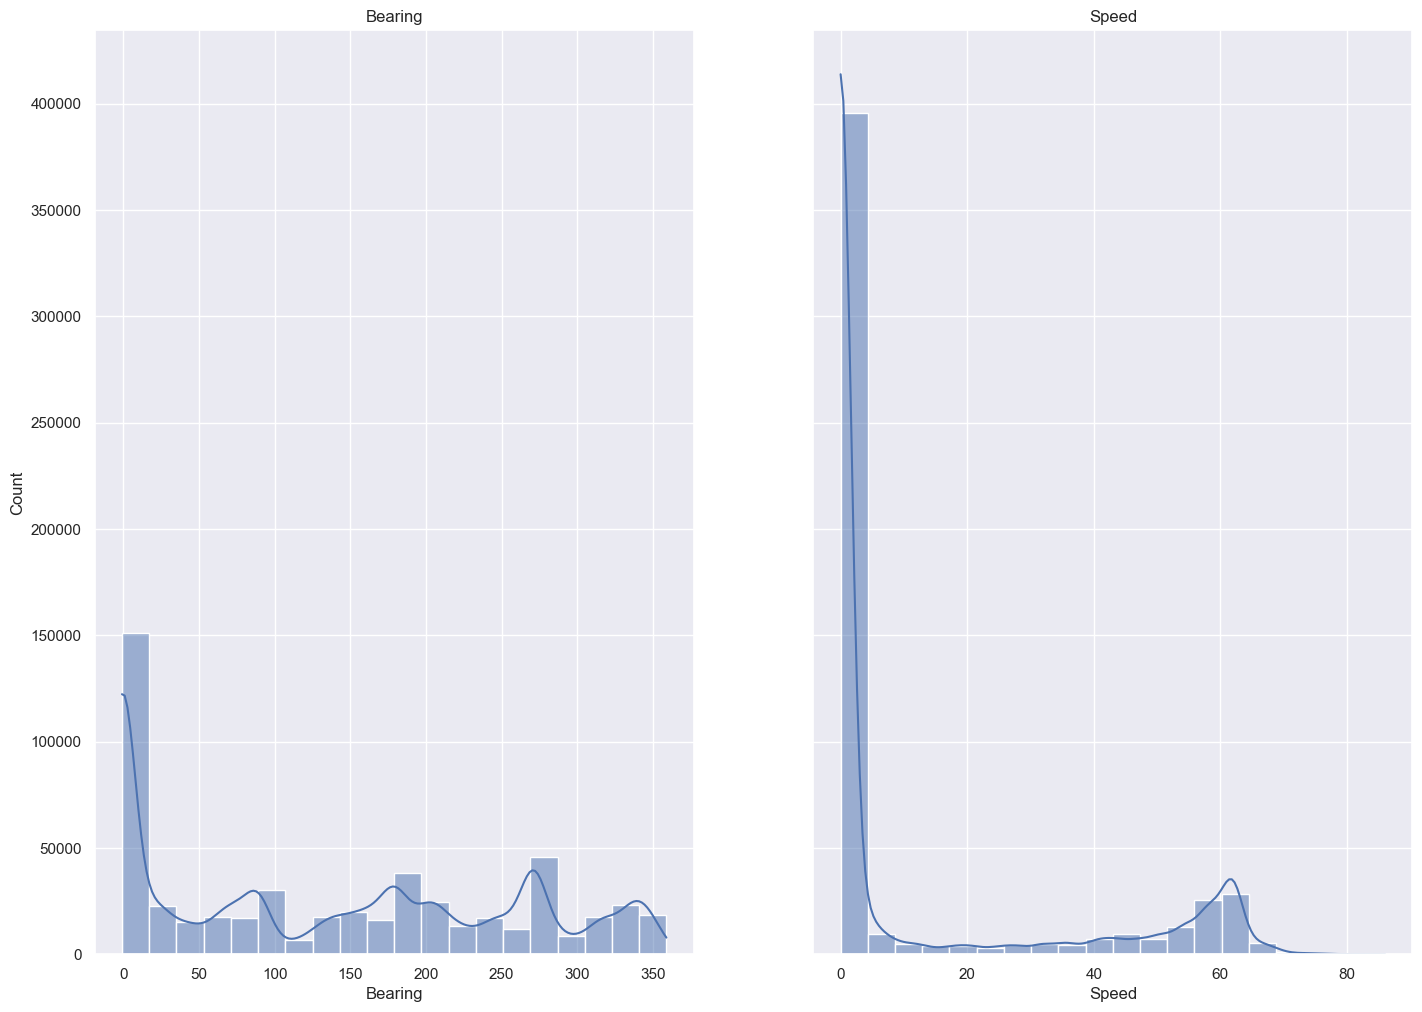

In [25]:
# Lista de variables a transformar
Variables_a_transformar = ['Bearing', 'Speed']

# Configuramos el tamaño de la figura para los histogramas
sns.set(rc={'figure.figsize': (17, 12)})

# Creamos una figura con un número de subplots igual a la cantidad de variables
fig, axes = plt.subplots(1, len(Variables_a_transformar), sharey=True)

# Iteramos a través de las variables y generamos histogramas con KDE
for i, variable in enumerate(Variables_a_transformar):
    sns.histplot(df[variable], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(variable)

plt.show()

Mediante los histogramas anteriores podemos observar que los camiones estan la mayoria del tiempo detenidos.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
columns_to_scale = ['Bearing', 'Speed']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now 'Bearing' and 'Speed' columns are scaled between 0 and 1


In [27]:
df.head(5)

,IdTruck,Latitude,Longitude,ApiDate,Bearing,Speed,IsDriving,Country,Ignition,SerialNumber,FormattedAddress
0,3127333,25.8704,-100.2552,2024-01-15 00:02:40.823,0.000000,0.0,0,Mexico,0,G915TMB1YB17,"VPCW+82, 65516 Entronque Laredo-Salinas Victor..."
1,3127334,27.4659,-99.5763,2024-01-15 00:02:40.863,0.002778,0.0,0,Mexico,0,G912E78BJUKR,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico"
2,3127335,27.4661,-99.5769,2024-01-15 00:02:40.823,0.713889,0.0,0,Mexico,0,G9SBN33M46K1,"Francisco Echegaray 3913, 150 Aniversario, 882..."
3,3127336,27.5941,-99.5424,2024-01-15 00:02:40.790,0.061111,0.0,0,Mexico,0,G952PWYSK55S,"Nuevo Laredo International Bridge III, Puente ..."
4,3127337,27.4657,-99.5767,2024-01-15 00:02:40.823,0.000000,0.0,0,Mexico,0,G9VUZ2PD10ZY,"FC8F+GJ, 88283 Nuevo Laredo, Tamaulipas, Mexico"


In [28]:
df.describe()

,IdTruck,Latitude,Longitude,Bearing,Speed,IsDriving,Ignition
count,5.318990e+05,531899.000000,531899.000000,531899.000000,531899.000000,531899.000000,531899.000000
mean,3.395014e+06,25.090036,-99.990157,0.379120,0.137723,0.260636,0.431458
std,1.544480e+05,2.814180,0.939178,0.329839,0.256729,0.438982,0.495280
min,3.127333e+06,17.670700,-109.913900,0.000000,0.000000,0.000000,0.000000
25%,3.261264e+06,22.935350,-100.289800,0.002778,0.000000,0.000000,0.000000
50%,3.395012e+06,25.886800,-99.872800,0.369444,0.000000,0.000000,0.000000
75%,3.528766e+06,27.465900,-99.576800,0.677778,0.069767,1.000000,1.000000
max,3.662531e+06,28.616400,-89.674400,1.000000,1.000000,1.000000,1.000000
